In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

import bacco
import baccoemu

import sys
sys.path.append('/dipc/kstoreyf/muchisimocks/scripts')
import utils

%load_ext autoreload
%autoreload 2

2024-03-25 12:09:41.739067: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
idx_LH = 2

### Load from muchisimocks

In [3]:
param_names_all = ['omega_cold', 'sigma_8', 'h', 'omega_baryon', 'n_s', 'seed']
param_names = ['omega_cold', 'sigma_8', 'h']
param_names_fixed = [name for name in param_names_all if name not in param_names]
idxs_param_names = [param_names_all.index(name) for name in param_names]

tag_pk = '_b0000'
dir_pks = f'../data/pks_cosmolib/pks{tag_pk}'

bias_params = np.loadtxt(f'{dir_pks}/bias_params.txt')

dir_mocks = '../data/cosmolib'
fn_fields = f'{dir_mocks}/LH{idx_LH}/Eulerian_fields_lr_{idx_LH}.npy'
fn_params = f'{dir_mocks}/LH{idx_LH}/cosmo_{idx_LH}.txt'
fn_pk = f'{dir_pks}/pk_{idx_LH}.npy'

param_dict_fixed = {}
param_vals = np.loadtxt(fn_params)
if idx_LH==0:
    for name in param_names_fixed:
        param_dict_fixed[name] = param_vals[param_names_all.index(name)]
theta = param_vals[idxs_param_names]

pk_obj = np.load(fn_pk, allow_pickle=True).item()
gaussian_error_pk = pk_obj['pk_gaussian_error']
kk = pk_obj['k'] # all ks should be same so just grab one

print(param_names)
print(theta)

['omega_cold', 'sigma_8', 'h']
[0.3457742  0.82906755 0.71170615]


### Emulators

In [4]:
param_names_2_emu_param_names = {'sigma_8': 'sigma8_cold',
                                 'omega_cold': 'omega_cold',
                                 'h': 'hubble',
                                 'n_s': 'ns'}
emu_param_names = [param_names_2_emu_param_names[param_name] for param_name in param_names]

In [5]:
cosmo_params_base = utils.setup_cosmo_emu(cosmo='quijote')

Setting up emulator cosmology


In [6]:
cosmo_params = cosmo_params_base.copy()
for pp in range(len(param_names)):
    cosmo_params[emu_param_names[pp]] = theta[pp]

lbias emu

In [7]:
#emu = baccoemu.Lbias_expansion(verbose=False)
fn_emu = '/dipc_storage/cosmosims/data_share/lbias_emulator/lbias_emulator2.0.0'
emu_lbias = baccoemu.Lbias_expansion(verbose=False, 
                               nonlinear_emu_path=fn_emu,
                               nonlinear_emu_details='details.pickle',
                               nonlinear_emu_field_name='NN_n',
                               nonlinear_emu_read_rotation=False)


Loading l-bias lpt emulator...


/dipc/kstoreyf/.conda/envs/mlenv/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.24.2 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/kstoreyf/.conda/envs/mlenv/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.24.2 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
2024-03-25 12:12:23.760052: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_thread

L-bias lpt emulator loaded in memory.
Loading smeared bao emulator...


/dipc/kstoreyf/.conda/envs/mlenv/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/kstoreyf/.conda/envs/mlenv/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Smeared bao emulator loaded in memory.
Loading non-linear l-bias emulator...


/dipc/kstoreyf/.conda/envs/mlenv/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.1.1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/kstoreyf/.conda/envs/mlenv/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.1.1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Nonlinear l-bias emulator loaded in memory.
HIIII


/dipc/kstoreyf/.conda/envs/mlenv/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [8]:
k, pk_lbias, _ = emu_lbias.get_galaxy_real_pk(bias=bias_params, k=kk, 
                                                    **cosmo_params)

lbias emu public

In [9]:
emu_lbias_public = baccoemu.Lbias_expansion(verbose=False)


Loading l-bias lpt emulator...


/dipc/kstoreyf/.conda/envs/mlenv/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.24.2 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/kstoreyf/.conda/envs/mlenv/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.24.2 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/kstoreyf/.conda/envs/mlenv/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.24.2 when using vers

L-bias lpt emulator loaded in memory.
Loading smeared bao emulator...
Smeared bao emulator loaded in memory.
Loading non-linear l-bias emulator...


/dipc/kstoreyf/.conda/envs/mlenv/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/kstoreyf/.conda/envs/mlenv/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/kstoreyf/.conda/envs/mlenv/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using

Nonlinear l-bias emulator loaded in memory.
HIIII


/dipc/kstoreyf/.conda/envs/mlenv/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [10]:
k, pk_lbias_public, _ = emu_lbias_public.get_galaxy_real_pk(bias=bias_params, k=kk, 
                                                            **cosmo_params)

matter pk emu

In [11]:
emulator = baccoemu.Matter_powerspectrum(verbose=False)

HIIII


/dipc/kstoreyf/.conda/envs/mlenv/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/kstoreyf/.conda/envs/mlenv/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/kstoreyf/.conda/envs/mlenv/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.4.0

In [12]:
k, pk_lin_cold = emulator.get_linear_pk(k=kk, cold=True, **cosmo_params)
k, pk_lin_total = emulator.get_linear_pk(k=kk, cold=False, **cosmo_params)

### Original input and sim

In [13]:
npart = 512
boxsize = 1000.

bacco.configuration.update({'pk':{'boltzmann_solver': 'CLASS'}})
bacco.configuration.update({'pknbody' : {'ngrid'  :  npart}})
bacco.configuration.update({'scaling' : {'disp_ngrid' : npart}})

# CHOOSE COSMOLOGY
#cind = 0
inpath = '/dipc/kstoreyf/muchisimocks/data/cosmolib/'
cospars = np.loadtxt(inpath+'LH'+str(idx_LH)+'/cosmo_'+str(idx_LH)+'.txt')

# CHOOSE COSMOLOGY
Omega0 = cospars[0] #0.3175
sigma8 = cospars[1] #0.834
HubbleParam = cospars[2] #0.6711
OmegaBaryon = cospars[3] #0.049
ns = cospars[4] #0.9624
Seed= int(cospars[5]) #1915
expfactor = 1.0

pars_arr = np.array([Omega0, OmegaBaryon, HubbleParam, ns, sigma8])

## Start cosmology class

pars = {'omega_cdm':Omega0-OmegaBaryon, 'omega_baryon':OmegaBaryon, 'hubble':HubbleParam, 
        'neutrino_mass':0.0, 'sigma8':sigma8, 'ns':ns, 'expfactor':expfactor}
cosmo = bacco.Cosmology(**pars) #bacco.Cosmology(**bacco.cosmo_parameters.Planck13)  
print(cosmo)

2024-03-25 12:13:20,345 bacco.cosmo :    initialization took 0.000 secs


-----------------------------------------------
Cosmology "Default", de_model "LCDM" 
- Paramerers: Omega_cdm = 0.2967742021853691, Omega_b = 0.049, Omega_de = 0.6542257978146309, 
Hubble=0.7117061481828559, Sigma_8=0.8290675539429132, A_s=None, ns=0.9624, neutrino_mass=0.0, 
Omega_r=0.0, Omega_k=0.0, tau=0.0952, w0=-1, wa=0
- Power Spectrum: CLASS,   Expansion Factor: 1.0,   ReNormalizeInputSpectrum: True
-----------------------------------------------


In [14]:
k_input = cosmo._tabPowerSpectrum_z0['x']
pk_input = cosmo._tabPowerSpectrum_z0['y']

2024-03-25 12:13:22,256 bacco.cosmo :    computed CLASS power spectrum at z=0.00 in 0.578 secs
2024-03-25 12:13:22,264 bacco.cosmo :    created Pk(z=0) tab from k 0.0007117061481828558 to 100000.0 h/Mpc


Rerun lin field

In [18]:
# CREATE A ZA SIMULATION

sim, disp_field = bacco.utils.create_lpt_simulation(cosmo, boxsize, Nmesh=npart, Seed=Seed,
                                                    FixedInitialAmplitude=False,InitialPhase=0, 
                                                    expfactor=1, LPT_order=1, order_by_order=None,
                                                    phase_type=1, ngenic_phases=True, return_disp=True, 
                                                    sphere_mode=0)

2024-03-25 12:40:07,526 bacco.util : Initial conditions compatible with Gadget-3 Ngenic
2024-03-25 12:40:07,533 bacco.sims : Initialising simulation Default
2024-03-25 12:40:07,534 bacco.sims : ...done in 0.00133 s
2024-03-25 12:40:08,463 bacco.cosmo :    computed CLASS power spectrum at z=0.00 in 0.260 secs
2024-03-25 12:40:08,463 bacco.cosmo :    created Pk(z=0) tab from k 0.0007117061481828558 to 100000.0 h/Mpc


bacco.lss_scaler : 292 P(k) values; Di = (1.000000, 1.000000, 1.000000, 1.000000); nthreads =48; seed =2 
bacco.lss_scaler: start computing linear field...
bacco.lss_scaler: seed =2 ngrid=512 pkfixed=0 phase=0.000000, phase_type=1; precision=single 


2024-03-25 12:40:22,025 bacco.scaler : Adding displacement field with a vel-factor=55.546386


bacco.lss_scaler:  Adding LSS displacement: vel_factor=55.546386 mesh_dtype=4, use_vel=1, use_bias=0
bacco.lss_scaler:  Adding LSS displacement: looping over particles


In [19]:
norm=npart**3.
dens_lin = sim.linear_field[0]*norm
print(dens_lin.shape)

2024-03-25 12:40:24,943 bacco.sims : Generating linear field: Di=1.0


bacco.lss_scaler : 292 P(k) values; Di = (1.000000, 1.000000, 1.000000, 1.000000); nthreads =48; seed =2 
bacco.lss_scaler: start computing linear field...
bacco.lss_scaler: seed =2 ngrid=512 pkfixed=0 phase=0.000000, phase_type=0; precision=single 
(512, 512, 512)


In [20]:
## Create regular grid and displace particles
grid = bacco.visualization.uniform_grid(npix=npart, L=boxsize, ndim=3, bounds=False)

pred_pos = bacco.scaler.add_displacement(None,
                                    dens_lin, #pred_disp,
                                    box=boxsize,
                                    pos=grid.reshape(-1,3),
                                    vel=None,
                                    vel_factor=0,
                                    verbose=True)[0]

2024-03-25 12:40:34,359 bacco.scaler : Adding displacement field with a vel-factor=0.000000


bacco.lss_scaler:  Adding LSS displacement: vel_factor=0.000000 mesh_dtype=4, use_vel=0, use_bias=0
bacco.lss_scaler:  Adding LSS displacement: looping over particles


In [21]:
damping_scale = 0.7 #k_nyq
interlacing = False

bmodel = bacco.BiasModel(sim=sim, linear_delta=dens_lin, ngrid=npart, ngrid1=None, 
                            sdm=False, mode="dm",
                            npart_for_fake_sim=npart, damping_scale=damping_scale, 
                            bias_model='expansion', deposit_method="cic", 
                            use_displacement_of_nn=False, interlacing=interlacing, 
                            )

2024-03-25 12:40:35,831 bacco.BiasModel : Initialising Bias Model class ...


In [22]:
## Compute lagrangian fields
bias_fields = bmodel.bias_terms_lag()

## Compute eulerian fields
bias_terms_eul_pred=[]
for ii in range(0,len(bias_fields)):
    bias_terms_pred = bacco.statistics.compute_mesh(ngrid=npart, box=boxsize, pos=pred_pos, 
                                mass = (bias_fields[ii]).flatten(), deposit_method='cic', 
                                interlacing=interlacing)
    bias_terms_eul_pred.append(bias_terms_pred)
bias_terms_eul_pred = np.array(bias_terms_eul_pred)

2024-03-25 12:40:38,916 bacco.BiasModel : Computing delta_to_tidal_field with 48 threads...
2024-03-25 12:40:38,917 bacco.BiasModel : fttw plan
2024-03-25 12:40:38,918 bacco.BiasModel : Computing linear field ...
2024-03-25 12:40:38,919 bacco.BiasModel : Memory used: 11.256160256 Gigabytes
2024-03-25 12:40:38,921 bacco.BiasModel : fttw freqs
2024-03-25 12:40:38,921 bacco.BiasModel : tidk freqs
2024-03-25 12:40:45,064 bacco.BiasModel : ifft


RuntimeError: The data has an uncaught error that led to the planner returning NULL. This is a bug.

#### Compute p(k)

In [7]:
box_size = 1000.0

k_min = 10**-3
k_max = 10**3
n_bins = 100
log_binning = True
k = np.logspace(np.log10(k_min),np.log10(k_max),n_bins)

args_power = {'ngrid':512,
            'box':box_size,
            'cosmology':cosmo,
            'interlacing':False,
            'kmin':k_min,
            'kmax':k_max,
            'nbins':n_bins,
            'correct_grid':True,
            'log_binning':log_binning,
            'deposit_method':'cic',
            'compute_correlation':False,
            'zspace':False,
            'compute_power2d':False}

bacco.configuration.update({'number_of_threads': 8})


In [8]:
tracer_field = bias_terms_eul_pred

# NOTE assumes tracer field is already normalized!
pk_lin = bacco.statistics.compute_crossspectrum_twogrids(
                    grid1=tracer_field,
                    grid2=tracer_field,
                    normalise_grid1=True,
                    normalise_grid2=True,
                    deconvolve_grid1=False,
                    deconvolve_grid2=False,
                    **args_power)

2024-03-24 22:44:55,480 bacco.statistics : Computing the power spectrum with ngrid=512 and interlacing=False
2024-03-24 22:44:55,487 bacco.cosmo :    computed halofit at z=0.00 for 'Default' in 0.004 secs


bacco.power : boxsize 1000.000000; ngrid 512; nthreads 8; interlacing 0; deposit_method 1; log_binning 1; type 1; precision=single; correct_grid=1 (log=1); correct_sn=0
bacco.power : normalise_grid1=1 normalise_grid2=1 deconvolve_grid1=0 deconvolve_grid2=0
bacco.power : total mass 3.78656e-19 (grid1) 3.78656e-19 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.230240 sec
bacco.power : Counting modes
bacco.power : done counting modes in 1.003339 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.000338 secs
bacco.power : Deallocating arrays


2024-03-24 22:45:02,363 bacco.statistics :  ...done in 6.88 s


### Plot all

/tmp/ipykernel_234216/2540045270.py:26: RuntimeWarning: divide by zero encountered in divide
  ax1.plot(k, (pk_lbias-pk_m2m)/denom, ls=':', alpha=0.5, color=color_pk_lbias)
/tmp/ipykernel_234216/2540045270.py:27: RuntimeWarning: divide by zero encountered in divide
  ax1.plot(k, (pk_lbias_public-pk_m2m)/denom, ls='-.', alpha=0.5, color=color_pk_lbias_public)


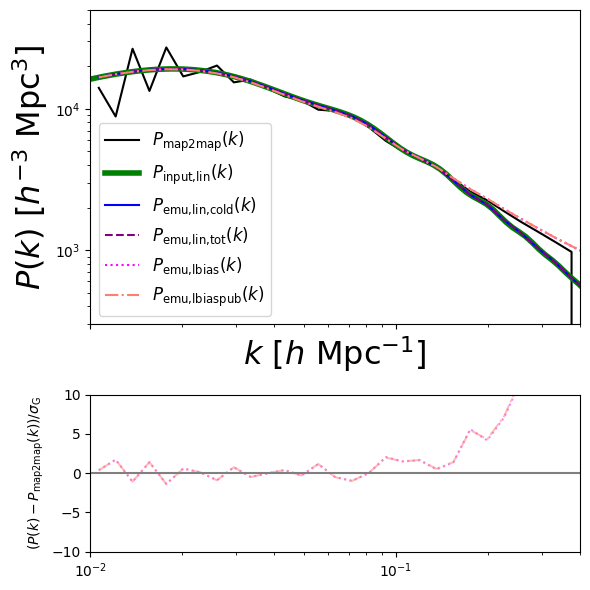

In [17]:
nrows, ncols = 2, 1
fig, axarr = plt.subplots(nrows, ncols, figsize=(6,6), sharex=True, height_ratios=[2,1])
plt.subplots_adjust(hspace=0)
ax, ax1 = axarr

color_pk, color_pk_cold, color_pk_tot = 'black', 'blue', 'purple', 
color_pk_lbias, color_pk_lbias_public = 'magenta', 'salmon'
color_inlin = 'green'

n_plot = 1

pk_m2m = pk_obj['pk']
ax.loglog(kk, pk_m2m, label=r'$P_\text{map2map}(k)$', color=color_pk)
ax.loglog(k_input, pk_input, label=r'$P_\text{input,lin}(k)$', color=color_inlin, lw=4)
ax.loglog(k, pk_lin_cold, label=r'$P_\text{emu,lin,cold}(k)$', color=color_pk_cold)
ax.loglog(k, pk_lin_total, label=r'$P_\text{emu,lin,tot}(k)$', ls='--', color=color_pk_tot)
ax.loglog(k, pk_lbias, label=r'$P_\text{emu,lbias}(k)$', ls=':', color=color_pk_lbias)
ax.loglog(k, pk_lbias_public, label=r'$P_\text{emu,lbiaspub}(k)$', ls='-.', color=color_pk_lbias_public)

#ax.loglog(kk, Pk_lin[idx_LH], label=r'$P_\text{lin}(k)$')
#ax.loglog(kk, Pk_nl[idx_LH], label=r'$P_\text{nl}(k)$')

denom = gaussian_error_pk
#ax1.plot(k, (pk_lin_cold-pk_m2m)/denom, ls='-', alpha=0.5, color=color_pk_cold)
#ax1.plot(k, (pk_lin_total-pk_m2m)/denom, ls='--', alpha=0.5, color=color_pk_tot)
ax1.plot(k, (pk_lbias-pk_m2m)/denom, ls=':', alpha=0.5, color=color_pk_lbias)
ax1.plot(k, (pk_lbias_public-pk_m2m)/denom, ls='-.', alpha=0.5, color=color_pk_lbias_public)

ax1.axhline(0, color='grey')

ax.set_xlabel(r'$k \,\, [h \,\, {\rm Mpc}^{-1}]$', fontsize=23)
ax.set_ylabel(r'$P(k) \,\, [h^{-3} \,\, {\rm Mpc}^3]$', fontsize=23)
ax1.set_ylabel(r'$(P(k)-P_\text{map2map}(k))/\sigma_\text{G}$')
ax.set_xlim(1e-2, 0.4)
ax.set_ylim(3e2, 5e4)

ax1.set_ylim(-10, 10)

ax.legend(fontsize=12)

mpl.pyplot.tight_layout()
mpl.pyplot.show()

### Check cosmo param agreement

Emu:

In [ ]:
cosmo_params

{'omega_cold': 0.3457742021853691,
 'sigma8_cold': 0.8290675539429132,
 'omega_baryon': 0.049,
 'ns': 0.9624,
 'hubble': 0.7117061481828559,
 'neutrino_mass': 0.0,
 'w0': -1.0,
 'wa': 0.0,
 'expfactor': 1.0}

Bacco / map2map:

In [ ]:
cosmo.pars

{'hubble': 0.7117061481828559,
 'sigma8': 0.8290675539429132,
 'A_s': None,
 'omega_baryon': 0.049,
 'omega_cdm': 0.2967742021853691,
 'w0': -1,
 'wa': 0,
 'ns': 0.9624,
 'tau': 0.0952,
 'approx_nu': False,
 'num_massive_neutrinos': 0,
 'neutrino_mass': 0.0,
 'Neffective': 3.046,
 'DeltaNeff': 3.046,
 'GammaNu': 0.71611,
 'omega_neutrino': 0.0,
 'omega_matter': 0.3457742021853691,
 'omega_cold': 0.3457742021853691,
 'photon_temperature': 2.7255,
 'omega_photons': 0.0,
 'omega_rad': 0.0,
 'omega_de': 0.6542257978146309,
 'omega_k': 0.0,
 'omega_tot': 1.0}

### Linear sim

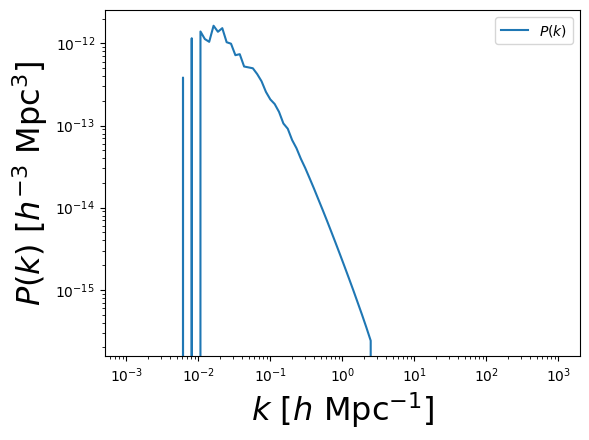

In [ ]:
fig, ax = mpl.pyplot.subplots(figsize=(6, 4.5))

ax.loglog(k_input, pk_input, label=r'$P(k)$')
#ax.loglog(k, pk_lin['pk'], label=r'$P(k)$')

ax.set_xlabel(r'$k \,\, [h \,\, {\rm Mpc}^{-1}]$', fontsize=23)
ax.set_ylabel(r'$P(k) \,\, [h^{-3} \,\, {\rm Mpc}^3]$', fontsize=23)

# ax.set_xlim(1e-2, 0.4)
# ax.set_ylim(1e3, 5e5)

plt.legend()

mpl.pyplot.tight_layout()
mpl.pyplot.show()